In [1]:
##Dataset = https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [2]:
##Amacımız araba almak isteyen kişinin istediği filtreleri filtrelemeleri yaparak bütçesine uygun bir araba almasını sağlamak.
#Bu sebeple öncelikle price prediction modeli oluşturup sonrasında filtreleme işlemleri yapacağız

# 1-)DATA UNDERSTANDING / VERİYİ ANLAMA

### Bu kısımda dataseti projeye aktarıyor , inceliyor ve basit derecede bilgi sahibi oluyoruz. Sonrasında bu bilgileri yorumluyoruz

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import FuncFormatter 

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [4]:
df_clean = pd.read_csv('vehicles.csv')

In [5]:
df = df_clean.copy()

In [6]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
df.shape

(426880, 26)

In [8]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [10]:
df.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

**Dataseti incelediğimiz zaman [cylinders,condition,drive,type] sütunlarının dikkate alınacak kadar null değer içerdiğini
data type ın çoğunlukla object olduğunu ve unique veri sayısını görüyoruz**

# 2-)EDA (Exploratory Data Analysis) - Keşifsel Veri Analizi
### Amacımız isminde de belirtildiği üzere veriyi keşfetmek ve veri hakkında daha detaylı bilgi sahibi olmak

In [11]:
#2.1 Öncelikle tamamen aynı olan satırları siliyoruz
df.drop_duplicates(inplace=True)

In [12]:
#2.2 Sonrasında kullanmayacağımız sütunları drop edelim

In [13]:
#url ,model vardı sildim test yapıyorum.

drop_columns = {"id","region","region_url","VIN","image_url","description","lat","long","posting_date","county","state","size","paint_color","url","model"}

df.drop(columns=drop_columns,axis=1,inplace=True)

In [14]:
# Drop işlemlerinden sonra df bu şekilde.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 35.8+ MB


In [15]:
#2.3 Df üzerindeki her bir sütunun unique veri sayısını ve verileri görmek için bir for döngüsü yazıyoruz.

for column in df.columns:
    print(f"kolon ismi :{column} -- uniuqe veri sayısı:{df[column].nunique()}\n uniuqe verileri: {df[column].unique()}\n**********************************************")

kolon ismi :price -- uniuqe veri sayısı:15655
 uniuqe verileri: [ 6000 11900 21000 ...  6328 19853 17873]
**********************************************
kolon ismi :year -- uniuqe veri sayısı:114
 uniuqe verileri: [  nan 2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018.
 2004. 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998.
 2002. 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974.
 1996. 1987. 2000. 1955. 1960. 1991. 1972. 1988. 1994. 1929. 1984. 1986.
 1989. 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977.
 1993. 1903. 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980.
 1967. 1971. 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959.
 1950. 1930. 1956. 1922. 1928. 2022. 1901. 1941. 1924. 1927. 1939. 1923.
 1949. 1961. 1935. 1918. 1900. 1938. 1913. 1916. 1943. 1925. 1921. 1915.
 1945. 1902. 1905. 1920. 1944. 1910. 1909.]
**********************************************
kolon ismi :manufacturer -- uniuqe ver

In [16]:
#2.4 Artık df de gereksiz sütun yok şimdi var olan sütunlardaki NaN değerler farklı teknikler ile dolduracağız.
#    Sonrasında veride artık null değer olmadığı için hedef değişken analizi kısmına geçeceğiz her veri için 
#    grafikler çizip outlierları tespit edeceğiz ve bunları doğru yöntemler ile işleyeceğiz

=== NULL DEĞER ANALİZİ ===

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
dtype: int64

=== NULL DEĞER YÜZDELERİ ===

price            0.000000
year             0.282281
manufacturer     4.133714
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
dtype: float64


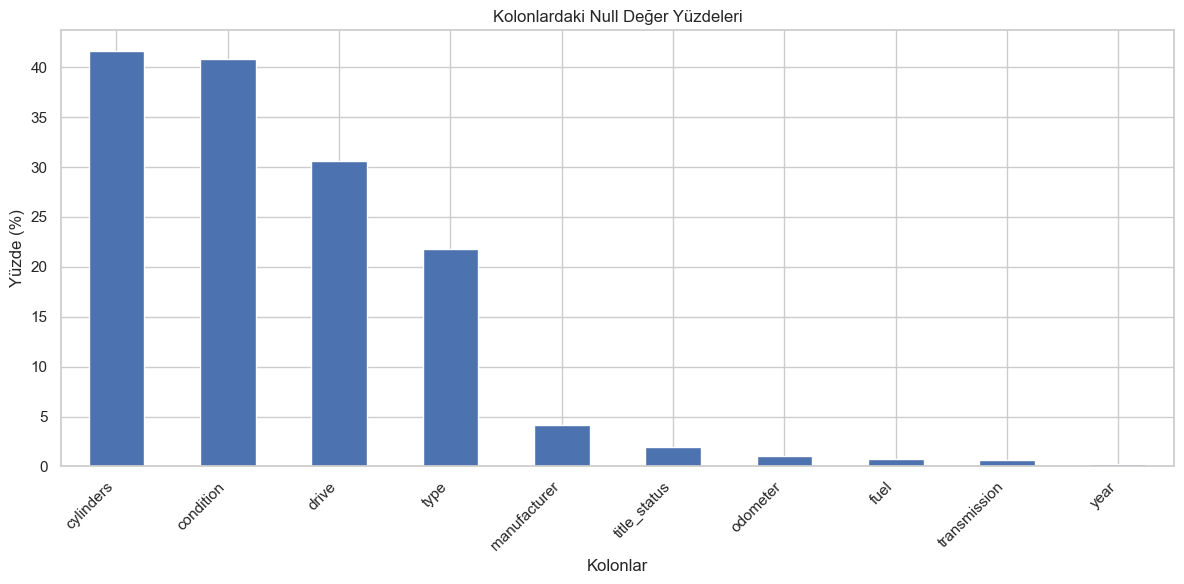

In [17]:
print("=== NULL DEĞER ANALİZİ ===\n")
print(df.isnull().sum())
print("\n=== NULL DEĞER YÜZDELERİ ===\n")
print((df.isnull().sum() / len(df)) * 100)


plt.figure(figsize=(12, 6))
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
null_percent.plot(kind='bar')
plt.title('Kolonlardaki Null Değer Yüzdeleri')
plt.ylabel('Yüzde (%)')
plt.xlabel('Kolonlar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Yukarıdaki grafikte göründüğü üzere [cylinders,condition,drive,type] sütunlarının dikkat çekici şekilde null değerler içeriyor şimdi bu sütunlardaki null değerleri uygun yöntemler ile işleyecek ve hiçbir sütunda null kalmayacak şekilde ayarlayacağız.

In [18]:
#2.5 Null değerleri doldururken kategorik ve numeric olarak ayrı ayrı işleyeceğiz. Bunun sebebi kullandığımız groupby fonksiyonunda
#    kategorik değişkenler için mode'u numeric değerler için medianı kullanıcak olmamız.

In [19]:
groupbyColumns = ["cylinders","fuel","transmission","drive","condition"]

In [20]:
#2.6 Gözüktüğü üzere cylinders,fuel,transmission sütunlarında other değerleri var.
#    Bu kısımda şöyle bir yol izeyeceğiz arabanın marka ve modeli ile groupby işlemi 
#    yaparak other olan verileri dolduracağız.

for column in groupbyColumns:
    print("---------------------- \n")
    print(f"kolon ismi:({column}) = {df[column].value_counts()}")

---------------------- 

kolon ismi:(cylinders) = cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64
---------------------- 

kolon ismi:(fuel) = fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64
---------------------- 

kolon ismi:(transmission) = transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64
---------------------- 

kolon ismi:(drive) = drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64
---------------------- 

kolon ismi:(condition) = condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


In [21]:
#2.7 önce sütunlarımızdaki other değerleri null a çeviriyoruz

for column in groupbyColumns:
    df.loc[df[column].str.contains('other', case=False, na=False), column] = np.nan
    print(f"{column} kolonundaki other değer sayısı = {(df[column]=="other").sum()}")    

cylinders kolonundaki other değer sayısı = 0
fuel kolonundaki other değer sayısı = 0
transmission kolonundaki other değer sayısı = 0
drive kolonundaki other değer sayısı = 0
condition kolonundaki other değer sayısı = 0


In [22]:
#2.8 Aşşağıda gözüktüğü üzere other olan gruplar manufacturer ve type kolonlarına göre gruplandı
#    ve modelarına göre dolduruldu artık null ya da other değerimiz yok

for column in groupbyColumns:
    df[column] = df.groupby(["manufacturer","type"],dropna=False)[column].transform(
    lambda x:x.fillna(x.mode()[0]) if not x.mode().empty else x
 )
    df.dropna(subset=[column],inplace=True)
    print(f"{df[column].value_counts()}")


cylinders
6 cylinders     154031
8 cylinders     134306
4 cylinders     132010
5 cylinders       3117
10 cylinders      1513
3 cylinders       1107
12 cylinders       216
Name: count, dtype: int64
fuel
gas         389305
diesel       30134
hybrid        5168
electric      1675
Name: count, dtype: int64
transmission
automatic    400846
manual        25430
Name: count, dtype: int64
drive
4wd    196094
fwd    149014
rwd     81140
Name: count, dtype: int64
condition
excellent    225486
good         170475
like new      21196
fair           6769
new            1713
salvage         601
Name: count, dtype: int64


In [23]:
#2.9 Cylinders sütunundaki cylinders yazısı bir şey ifade etmiyor ve numeric olmaya daha uygun bu sebeple öncelikle
#    cylinders yazısını atıyor sonrasında kolonun type nı numerice çeviriyoruz.

df["cylinders"] = df["cylinders"].str.split().str[0].astype(int)
print("Artık silindir sütunu numeric halde şu şekilde:")
df["cylinders"].value_counts()

Artık silindir sütunu numeric halde şu şekilde:


cylinders
6     154013
8     134288
4     131992
5       3117
10      1507
3       1107
12       216
Name: count, dtype: int64

In [24]:
#2.10 Kategorik değişkenler ile işimiz bitti ve artık sırada sayısal değişkenler var.
#     Öncelikle year sütunundaki null değerleri manufacturer sütunu ile gruplayıp
#     null değerleri medianı ile dolduruyoruz.
df["year"] = df.groupby("manufacturer",dropna=False)["year"].transform(
    lambda x: x.fillna(x.median())
)

df.dropna(subset=["manufacturer"],inplace=True)

In [25]:
#2.11 Odometer fiyatı doğrudan etkileyeceği için direkt null değerleri doldurursak data leakge riski çok yüksek fakat
#     doldurmassak sonrasında oluşturacağımız grafikler bize doğru sonuçlar vermez bu sebeple geçiçi bir df_eda kopyası
#     oluşturacağız ilerleyen kısımlarda bu kopyayı güncelleyerek grafiklerde kullanacağız fakat modeli eğittiğimiz kısımlarda
#     asla df_eda kullanılmayacak data leakage sebebiyet vereceği için!

df_eda = df.copy()

df_eda["odometer"] = df_eda.groupby(["manufacturer","type","year"],dropna=False)["odometer"].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)

df_eda.dropna(subset=["odometer"],inplace=True)

In [26]:
#2.12 Title status kolonu için ise gruplama yapmadan mode ile doldurma işlemi gerçekleştiriyoruz.

df["title_status"].fillna(df["title_status"].mode()[0], inplace=True)

In [27]:
#2.13 Type kısmındaki boşlukları doldurmak için anahtar kelime kullanan bir fonksiyon yazdık bu fonksiyon sayesinde belirli kelimeler algılandığında
#     type kolonu otomatik bir şekilde dolduruluyor.

def fill_type_from_model_column(df, df_with_model):
    """
    df_with_model'deki model kolonunu kullanarak df'in type kolonunu doldur
    
    Parameters:
    -----------
    df : DataFrame
        Type'ı doldurulacak DataFrame (model kolonu yok)
    df_with_model : DataFrame
        Model kolonuna sahip DataFrame
        
    Returns:
    --------
    df : DataFrame with filled 'type' column
    """
    print("=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===\n")
    
    # Model bilgisini geçici ekle
    if len(df) == len(df_with_model):
        df['model_temp'] = df_with_model['model'].values
    else:
        # Index bazlı merge
        df = df.merge(
            df_with_model[['model']], 
            left_index=True, 
            right_index=True, 
            how='left',
            suffixes=('', '_temp')
        )
        if 'model_temp' not in df.columns:
            df.rename(columns={'model': 'model_temp'}, inplace=True)
    
    print(f"Başlangıç type null: {df['type'].isnull().sum()}")
    
    # Extraction fonksiyonu
    def extract_type(row):
        if pd.notna(row['type']):
            return row['type']
        
        if pd.isna(row['model_temp']):
            return None
        
        model = str(row['model_temp']).lower()
        
        # Comprehensive keywords
        type_keywords = {
            'pickup': ['f-150', 'f-250', 'f-350', 'silverado', 'sierra', 'ram', 
                      'tundra', 'tacoma', 'ranger', 'colorado', 'frontier', 'titan'],
            'SUV': ['4runner', 'explorer', 'tahoe', 'suburban', 'highlander', 
                    'pilot', 'pathfinder', 'expedition', 'durango', 'traverse',
                    'cr-v', 'rav4', 'rogue', 'equinox', 'escape'],
            'sedan': ['camry', 'accord', 'civic', 'corolla', 'altima', 'sentra',
                     'malibu', 'fusion', 'impala', 'optima', 'sonata', 'elantra'],
            'coupe': ['mustang', 'camaro', 'corvette', 'challenger', 'charger',
                     '370z', '350z', 'miata', 'brz', 'gt-r'],
            'van': ['odyssey', 'sienna', 'pacifica', 'caravan', 'quest', 'town'],
            'hatchback': ['golf', 'focus', 'fiesta', 'fit', 'yaris', 'prius']
        }
        
        for vehicle_type, keywords in type_keywords.items():
            if any(keyword in model for keyword in keywords):
                return vehicle_type
        
        return None
    
    # Apply
    print("1️⃣ Model isminden type çıkarılıyor...")
    df['type'] = df.apply(extract_type, axis=1)
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Manufacturer bazlı mode
    print("2️⃣ Manufacturer bazlı mode...")
    df['type'] = df.groupby('manufacturer')['type'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty and len(x.dropna()) > 0 else x
    )
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Unknown
    print("3️⃣ Kalan null'lar 'unknown' yapılıyor...")
    df['type'].fillna('unknown', inplace=True)
    print(f"   Final null: {df['type'].isnull().sum()}")
    
    # Temizlik
    df = df.drop('model_temp', axis=1)
    
    print("\n✅ Type doldurma tamamlandı!")
    print("\nType dağılımı:")
    print(df['type'].value_counts())
    
    return df

# Kullanım
df = fill_type_from_model_column(df, df_clean)

=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===

Başlangıç type null: 86295
1️⃣ Model isminden type çıkarılıyor...
   Sonrası null: 49988
2️⃣ Manufacturer bazlı mode...
   Sonrası null: 0
3️⃣ Kalan null'lar 'unknown' yapılıyor...
   Final null: 0

✅ Type doldurma tamamlandı!

Type dağılımı:
type
sedan          117634
SUV             90340
pickup          74027
truck           33492
other           21246
coupe           20649
hatchback       17236
van             10720
wagon           10532
convertible      7152
mini-van         4682
offroad           570
bus               314
Name: count, dtype: int64


In [28]:
df.isna().sum()

price              0
year               0
manufacturer       0
condition          0
cylinders          0
fuel               0
odometer        4151
title_status       0
transmission       0
drive              0
type               0
dtype: int64

In [29]:
df['odometer'].fillna(df['odometer'].median(), inplace=True)

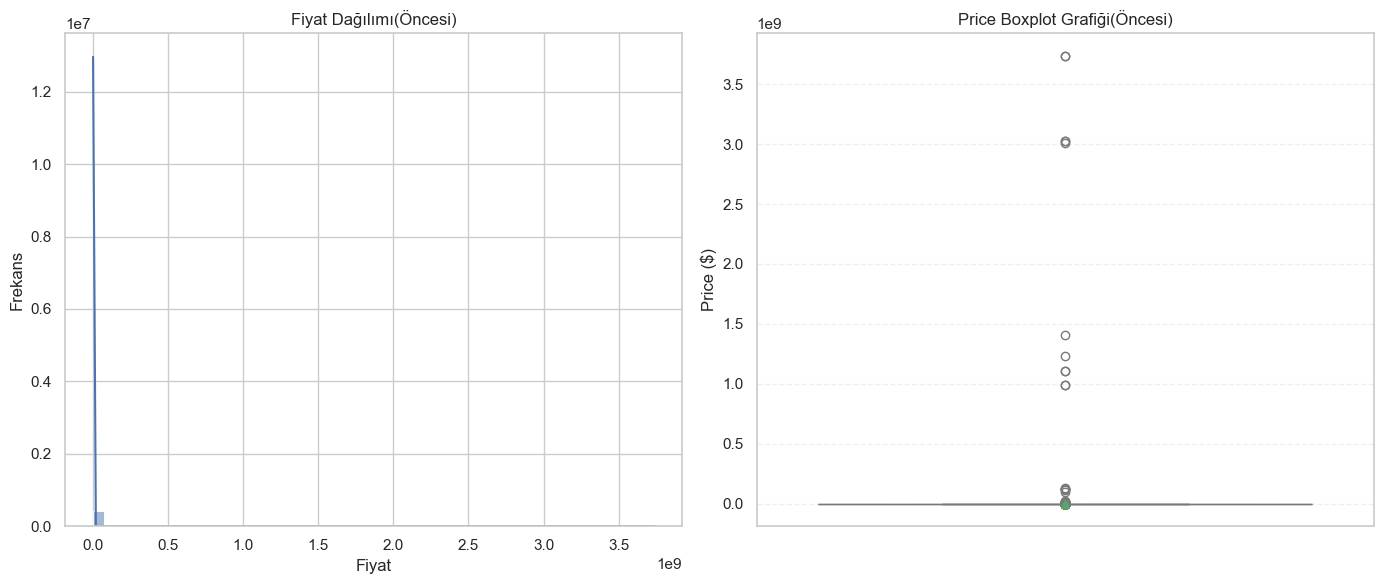

In [30]:
#2.14 Artık kolonlarımızda null değerler olmadığına göre kolonları hem frekansları hemde diğer kolonlarla ilişkileirni görmek
#     için grafikler oluşturacak ve yorumlayacağız.Öncelikle hedef değişkenimiz olan price kolonunun frekansını görmek için bir
#     histogram grafiği ve outlier değerleri inceleyebilmek için boxplot grafiği oluşturuyoruz.

plt.figure(figsize=(14,6))  

plt.subplot(1, 2, 1)  
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Fiyat Dağılımı(Öncesi)")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")

plt.subplot(1, 2, 2)  
sns.boxplot(data=df, y="price", color="lightblue", showmeans=True)
plt.title("Price Boxplot Grafiği(Öncesi)")
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()  
plt.show()


In [31]:
#2.15 Grafik gözüktüğü üzere mantıksız bir şekilde bunun sebebi outlier değerler olabilir bunu incelememiz ve bu sorunu çözmemiz gerekiyor.

print(df["price"].describe())

count    4.085940e+05
mean     7.706622e+04
std      1.244890e+07
min      0.000000e+00
25%      5.975000e+03
50%      1.398000e+04
75%      2.599900e+04
max      3.736929e+09
Name: price, dtype: float64


In [32]:
print("="*60)
print("PRICE OUTLIER ANALİZİ")
print("="*60)

print("\n Temel İstatistikler:")
pd.options.display.float_format = '{:.3f}'.format
print(df['price'].describe())

print("\n En DÜŞÜK 20 fiyat:")
print(df['price'].nsmallest(20).values)

print("\n En YÜKSEK 20 fiyat:")
print(df['price'].nlargest(20).values)

print("\n Fiyat Aralıkları:")
print(f"$0 - $500 arası:      {len(df[df['price'] < 500]):,} araba")
print(f"$500 - $1,000:        {len(df[(df['price'] >= 500) & (df['price'] < 1000)]):,} araba")
print(f"$1,000 - $5,000:        {len(df[(df['price'] >= 1000) & (df['price'] < 5000)]):,} araba")
print(f"$5,000 - $20,000:       {len(df[(df['price'] >= 5000) & (df['price'] < 20000)]):,} araba")
print(f"$20,000 - $50,000:      {len(df[(df['price'] >= 20000) & (df['price'] < 50000)]):,} araba")
print(f"$50,000 - $100,000:     {len(df[(df['price'] >= 50000) & (df['price'] < 100000)]):,} araba")
print(f"$100,000 - $500,000:     {len(df[(df['price'] >= 100000) & (df['price'] < 500000)]):,} araba")
print(f"$500,000+:              {len(df[df['price'] >= 500000]):,} araba")

print("\n Mantıksız Fiyatlar:")
print(f"$0 fiyatlı:             {len(df[df['price'] == 0]):,} araba")
print(f"$1-100 arası:           {len(df[(df['price'] > 0) & (df['price'] <= 100)]):,} araba")
print(f"$1,000,000+:            {len(df[df['price'] >= 1000000]):,} araba")
print("="*60)

PRICE OUTLIER ANALİZİ

 Temel İstatistikler:
count       408594.000
mean         77066.218
std       12448895.834
min              0.000
25%           5975.000
50%          13980.000
75%          25999.000
max     3736928711.000
Name: price, dtype: float64

 En DÜŞÜK 20 fiyat:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 En YÜKSEK 20 fiyat:
[3736928711 3736928711 3024942282 3024942282 3009548743 1410065407
 1234567890 1111111111 1111111111  987654321  987654321  135008900
  123456789  123456789  123456789  123456789  113456789   99999999
   25003000   17000000]

 Fiyat Aralıkları:
$0 - $500 arası:      40,039 araba
$500 - $1,000:        3,754 araba
$1,000 - $5,000:        46,373 araba
$5,000 - $20,000:       175,886 araba
$20,000 - $50,000:      130,805 araba
$50,000 - $100,000:     11,239 araba
$100,000 - $500,000:     441 araba
$500,000+:              57 araba

 Mantıksız Fiyatlar:
$0 fiyatlı:             31,406 araba
$1-100 arası:           3,138 araba
$1,000,000+:            51 arab

In [33]:
#2.16 Yukarıda gözüktüğü üzere veri setinde 0 dolar ve milyar değerlere sahip olan arabalar var (0 ve 3736928711 gibi)
#     bizim amacımız gerçek dünya verileri ile olabildiğince orantılı bir model geliştirmek olduğundan 500.000 dolar
#     üzeri ve 500 dolar altı araçları df den sileceğiz. 

In [34]:
df.drop(df[(df['price'] < 500) | (df['price'] > 500000)].index, inplace=True)

In [35]:
# En düşük ve en yüksek fiyatlara bak
print("="*60)
print("PRICE OUTLIER ANALİZİ")
print("="*60)

print("\n Temel İstatistikler:")
pd.options.display.float_format = '{:.3f}'.format
print(df['price'].describe())

print("\n En DÜŞÜK 20 fiyat:")
print(df['price'].nsmallest(20).values)

print("\n En YÜKSEK 20 fiyat:")
print(df['price'].nlargest(20).values)

print("\n Fiyat Aralıkları:")
print(f"$0 - $500 arası:      {len(df[df['price'] < 500]):,} araba")
print(f"$500 - $1,000:        {len(df[(df['price'] >= 500) & (df['price'] < 1000)]):,} araba")
print(f"$1,000 - $5,000:        {len(df[(df['price'] >= 1000) & (df['price'] < 5000)]):,} araba")
print(f"$5,000 - $20,000:       {len(df[(df['price'] >= 5000) & (df['price'] < 20000)]):,} araba")
print(f"$20,000 - $50,000:      {len(df[(df['price'] >= 20000) & (df['price'] < 50000)]):,} araba")
print(f"$50,000 - $100,000:     {len(df[(df['price'] >= 50000) & (df['price'] < 100000)]):,} araba")
print(f"$100,000 - $500,000:     {len(df[(df['price'] >= 100000) & (df['price'] < 500000)]):,} araba")
print(f"$500,000+:              {len(df[df['price'] >= 500000]):,} araba")

print("\n Mantıksız Fiyatlar:")
print(f"$0 fiyatlı:             {len(df[df['price'] == 0]):,} araba")
print(f"$1-100 arası:           {len(df[(df['price'] > 0) & (df['price'] <= 100)]):,} araba")
print(f"$1,000,000+:            {len(df[df['price'] >= 1000000]):,} araba")
print("="*60)

PRICE OUTLIER ANALİZİ

 Temel İstatistikler:
count   368498.000
mean     19250.392
std      14854.130
min        500.000
25%       7900.000
50%      15950.000
75%      27990.000
max     449500.000
Name: price, dtype: float64

 En DÜŞÜK 20 fiyat:
[500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500]

 En YÜKSEK 20 fiyat:
[449500 425000 349999 347999 304995 304995 304995 290000 289995 289900
 255000 244999 244999 239995 239995 239900 239900 229500 229500 229500]

 Fiyat Aralıkları:
$0 - $500 arası:      0 araba
$500 - $1,000:        3,754 araba
$1,000 - $5,000:        46,373 araba
$5,000 - $20,000:       175,886 araba
$20,000 - $50,000:      130,805 araba
$50,000 - $100,000:     11,239 araba
$100,000 - $500,000:     441 araba
$500,000+:              0 araba

 Mantıksız Fiyatlar:
$0 fiyatlı:             0 araba
$1-100 arası:           0 araba
$1,000,000+:            0 araba


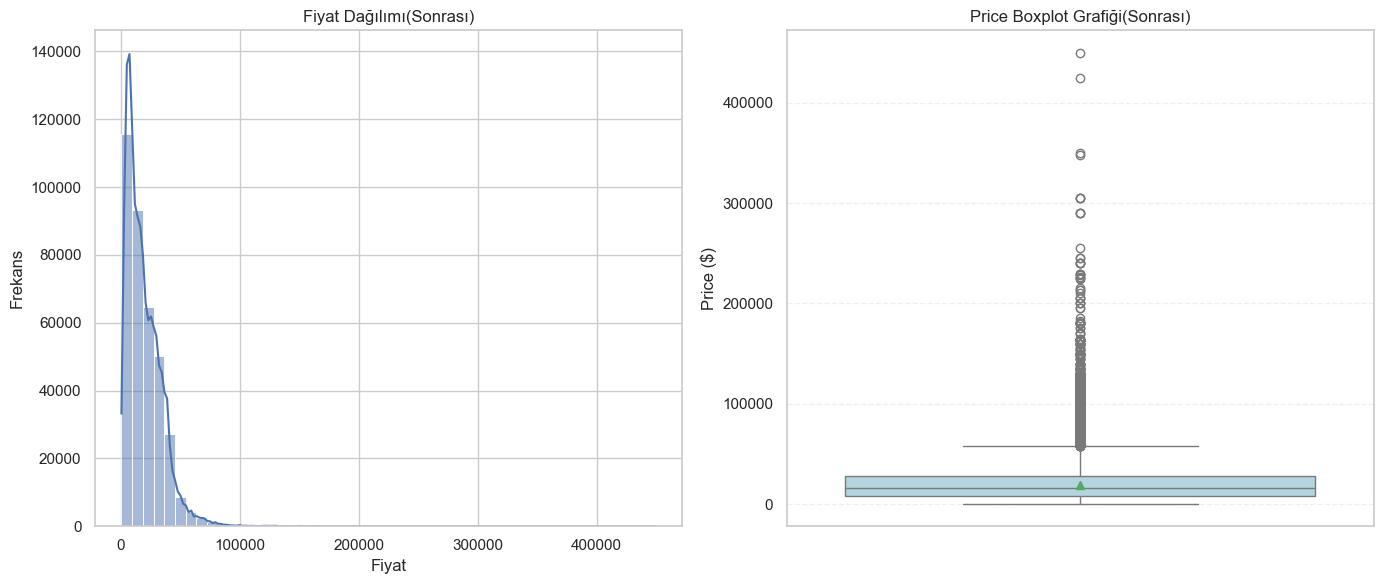

In [36]:
#2.17 Sonrasında aşşağıdaki grafikte gözüktüğü üzere grafiklerimiz düzeldi.

plt.figure(figsize=(14,6))  


plt.subplot(1, 2, 1)  
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Fiyat Dağılımı(Sonrası)")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")


plt.subplot(1, 2, 2)  
sns.boxplot(data=df, y="price", color="lightblue", showmeans=True)
plt.title("Price Boxplot Grafiği(Sonrası)")
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()  
plt.show()


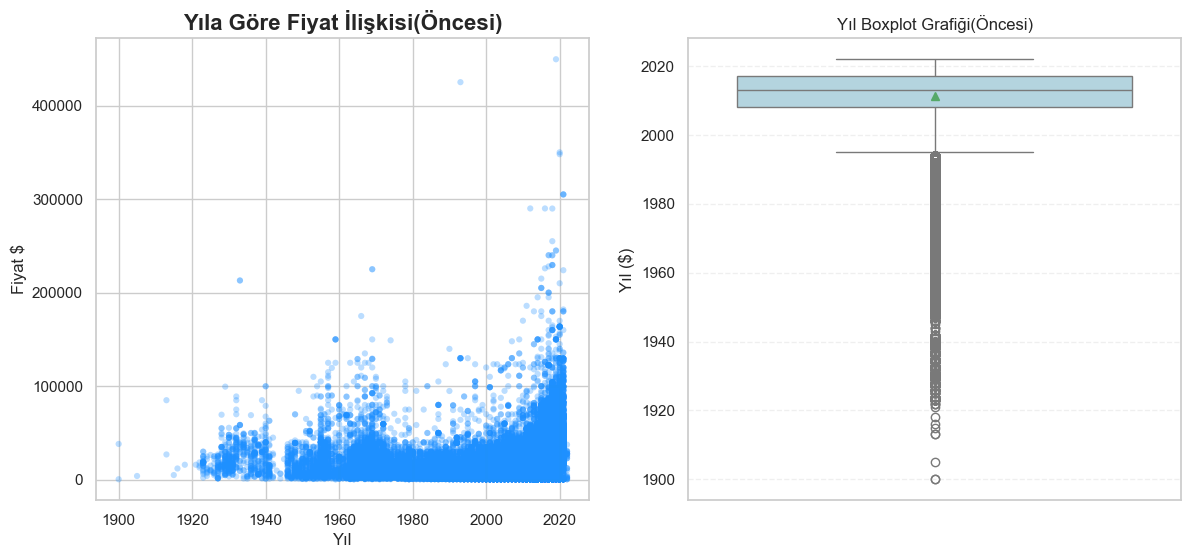

In [37]:
#2.18 Şimdi price kolonu outlierlerdan temizlendiği için diğer kolonlarla karşılaştırıp
#     istem dışı bir durum olup olmadığına bakacağız.

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(df["year"],df["price"],
            alpha=0.3 , s=20 ,color="dodgerblue" , edgecolors="none")
plt.title('Yıla Göre Fiyat İlişkisi(Öncesi)', 
          fontsize=16, weight='bold')
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Fiyat $', fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(data=df, y="year", color="lightblue", showmeans=True)
plt.title("Yıl Boxplot Grafiği(Öncesi)")
plt.ylabel('Yıl ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
#plt.show()

In [38]:
#2.19 1980 den daha yaşlı araçlar antika sayılabilir hurda olabilir bu sebeple fiyat aralığı çok saçma ve bizim amacımız olan
#     güncel arabaların fiyat tahmini amacına yardımcı olmuyor bu sebeple 1980 den daha önce üretilmiş arabaları df den siliyoruz. 
df = df[df["year"]>=1980]

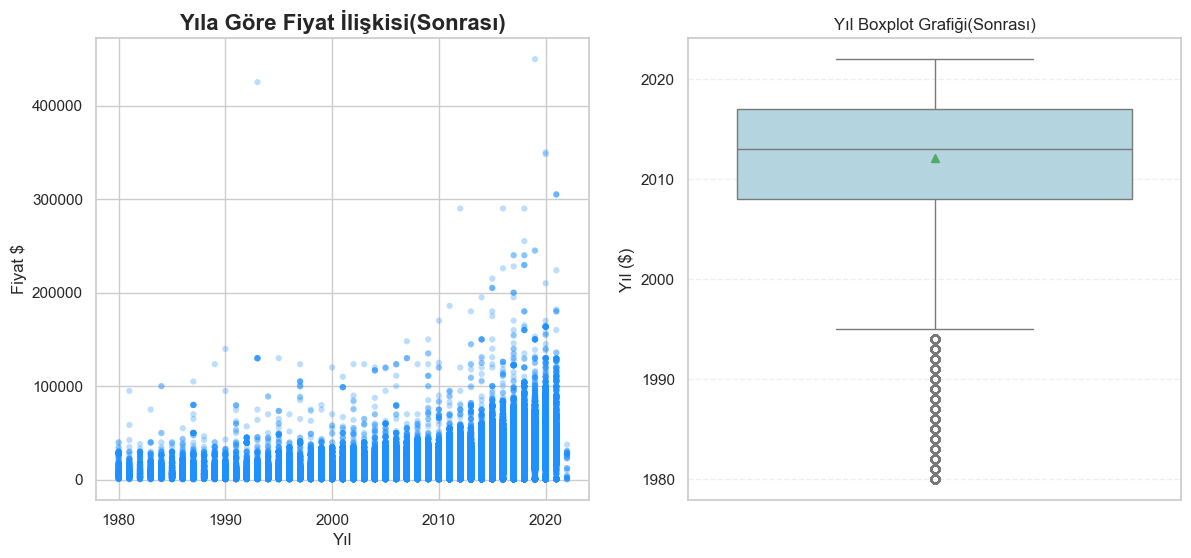

In [39]:
#2.20 Sonrasında gözüktüğü üzere daha temiz ve tutarlı grafikler elde ediyoruz.
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(df["year"],df["price"],
            alpha=0.3 , s=20 ,color="dodgerblue" , edgecolors="none")
plt.title('Yıla Göre Fiyat İlişkisi(Sonrası)', 
          fontsize=16, weight='bold')
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Fiyat $', fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(data=df, y="year", color="lightblue", showmeans=True)
plt.title("Yıl Boxplot Grafiği(Sonrası)")
plt.ylabel('Yıl ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()

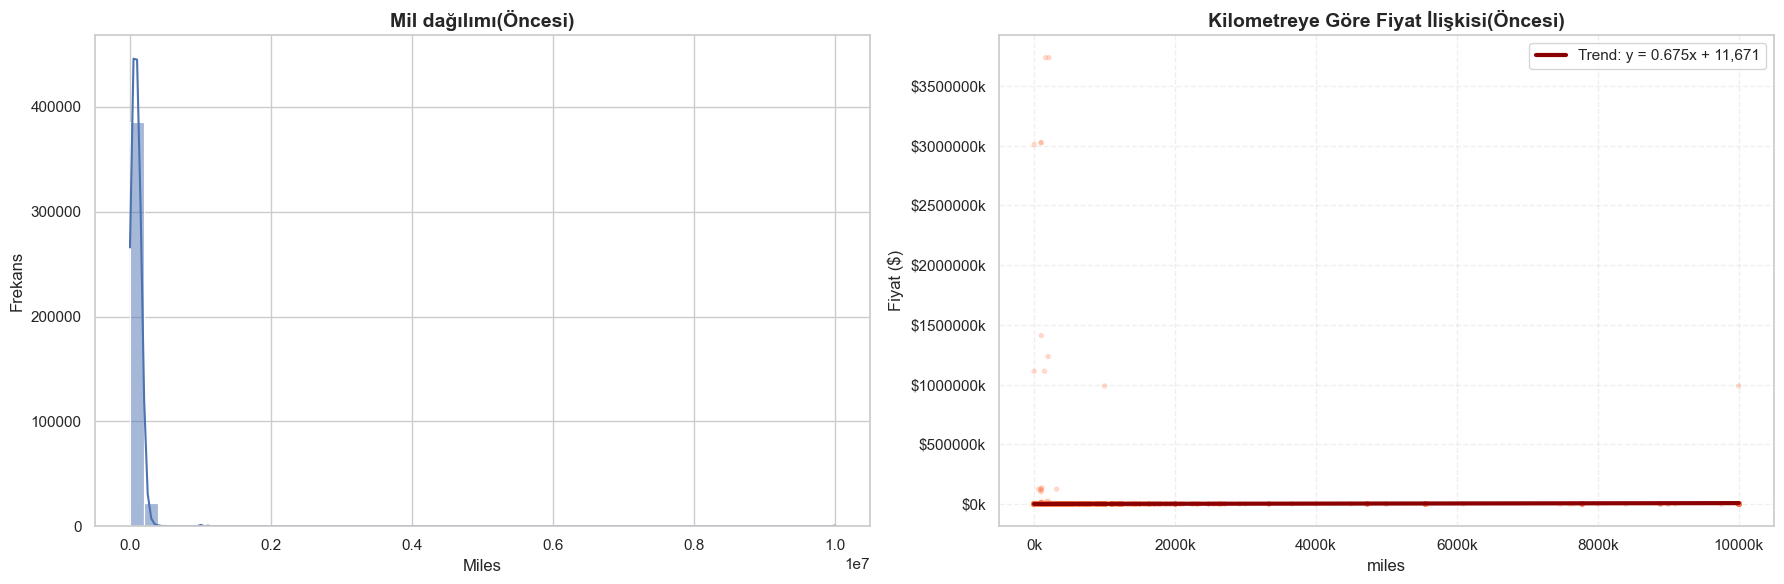

In [40]:
#2.21 Mil dağılımının frekansını ve fiyat ile ilişkisini görmek istiyoruz bunu yaparken önceden kaydettiğimiz df_eda değişkenini kullanacağız

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.histplot(df_eda['odometer'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Mil dağılımı(Öncesi)", fontsize=14, weight='bold')
axes[0].set_xlabel("Miles", fontsize=12)
axes[0].set_ylabel("Frekans", fontsize=12)


axes[1].scatter(df_eda['odometer'], df_eda['price'], 
                alpha=0.3, s=15, color='coral', edgecolors='none')

# Trend line
z = np.polyfit(df_eda['odometer'], df_eda['price'], 1)
p = np.poly1d(z)
axes[1].plot(sorted(df_eda['odometer'].unique()), 
             p(sorted(df_eda['odometer'].unique())), 
             color='darkred', linewidth=3, 
             label=f'Trend: y = {z[0]:.3f}x + {z[1]:,.0f}')

axes[1].set_title('Kilometreye Göre Fiyat İlişkisi(Öncesi)', fontsize=14, weight='bold')
axes[1].set_xlabel('miles', fontsize=12)
axes[1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(fontsize=11, loc='upper right')

# Formatter fonksiyonları
def miles_formatter(x, p):
    return f'{x/1000:.0f}k'

def price_formatter(x, p):
    return f'${x/1000:.0f}k'

# Sağ grafiğe formatter uygula
axes[1].xaxis.set_major_formatter(FuncFormatter(miles_formatter))
axes[1].yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.tight_layout()
plt.show()

In [41]:
#2.22 Grafik düzgün gözükmüyor bu sebeple outlier analizi yapacağız.

In [42]:
# ========================================
# ODOMETER OUTLIER ANALİZİ
# ========================================
print("="*70)
print("ODOMETER (KİLOMETRE) OUTLIER ANALİZİ")
print("="*70)

print("\n Temel İstatistikler:")
print(df['odometer'].describe())

# En yüksek değerler
print(f"\nEn YÜKSEK 20 odometer değeri:")
print(df['odometer'].nlargest(20).values)

# Extreme değerlerin dağılımı
print(f"\nEXTREME DEĞERLER:")
print(f"300k+ miles: {len(df[df['odometer'] >= 300000]):,} araba ({len(df[df['odometer'] >= 300000])/len(df)*100:.2f}%)")
print(f"400k+ miles: {len(df[df['odometer'] >= 400000]):,} araba ({len(df[df['odometer'] >= 400000])/len(df)*100:.2f}%)")
print(f"500k+ miles: {len(df[df['odometer'] >= 500000]):,} araba ({len(df[df['odometer'] >= 500000])/len(df)*100:.2f}%)")
print(f"1M+ miles: {len(df[df['odometer'] >= 1000000]):,} araba ({len(df[df['odometer'] >= 1000000])/len(df)*100:.2f}%)")

# Alt taraf outlier kontrolü
print(f"\nDÜŞÜK DEĞERLER:")
print(f"0 miles (Yeni araba): {len(df[df['odometer'] == 0]):,} araba")
print(f"0-1000 miles: {len(df[df['odometer'] < 1000]):,} araba")
print(f"1000-5000 miles: {len(df[(df['odometer'] >= 1000) & (df['odometer'] < 5000)]):,} araba")

print("="*70)

ODOMETER (KİLOMETRE) OUTLIER ANALİZİ

 Temel İstatistikler:
count     362110.000
mean       96306.243
std       138881.239
min            0.000
25%        39380.000
50%        88199.000
75%       136285.000
max     10000000.000
Name: odometer, dtype: float64

En YÜKSEK 20 odometer değeri:
[10000000. 10000000. 10000000. 10000000. 10000000. 10000000. 10000000.
 10000000.  9999999.  9999999.  9999999.  9999999.  9999999.  9999999.
  9999999.  9999999.  9999999.  9999999.  9999999.  9999999.]

EXTREME DEĞERLER:
300k+ miles: 1,903 araba (0.53%)
400k+ miles: 656 araba (0.18%)
500k+ miles: 517 araba (0.14%)
1M+ miles: 247 araba (0.07%)

DÜŞÜK DEĞERLER:
0 miles (Yeni araba): 743 araba
0-1000 miles: 5,978 araba
1000-5000 miles: 6,537 araba


In [43]:
#2.23 300.000 mil 482.803 kilometre yapar bu değerin üstündeki araçlar hurda olmaya daha meilli olduğu için
#     ve bu verileri azınlıkta olduğu için (yaklaşık %1) 300.000 mil üzeri araçları df den siliyoruz. 

print(f"300.000 milden yüksek araç sayısı:{len(df[df["odometer"] > 300000])}")

df = df[df["odometer"]<=300000]


print("\n⚠️ df_eda güncelleniyor...")
df_eda = df.copy()
df_eda["odometer"] = df_eda.groupby(["manufacturer","type","year"])["odometer"].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)
if df_eda['odometer'].isnull().sum() > 0:
    df_eda['odometer'].fillna(df_eda['odometer'].median(), inplace=True)
print(f"✅ df_eda güncellendi")

300.000 milden yüksek araç sayısı:1712

⚠️ df_eda güncelleniyor...
✅ df_eda güncellendi


In [44]:
# ========================================
# ODOMETER OUTLIER ANALİZİ
# ========================================
print("="*70)
print("ODOMETER (KİLOMETRE) OUTLIER ANALİZİ")
print("="*70)

print("\n Temel İstatistikler:")
print(df['odometer'].describe())

# En yüksek değerler
print(f"\nEn YÜKSEK 20 odometer değeri:")
print(df['odometer'].nlargest(20).values)

# Extreme değerlerin dağılımı
print(f"\nEXTREME DEĞERLER:")
print(f"300k+ miles: {len(df[df['odometer'] >= 300000]):,} araba ({len(df[df['odometer'] >= 300000])/len(df)*100:.2f}%)")
print(f"400k+ miles: {len(df[df['odometer'] >= 400000]):,} araba ({len(df[df['odometer'] >= 400000])/len(df)*100:.2f}%)")
print(f"500k+ miles: {len(df[df['odometer'] >= 500000]):,} araba ({len(df[df['odometer'] >= 500000])/len(df)*100:.2f}%)")
print(f"1M+ miles: {len(df[df['odometer'] >= 1000000]):,} araba ({len(df[df['odometer'] >= 1000000])/len(df)*100:.2f}%)")

# Alt taraf outlier kontrolü
print(f"\nDÜŞÜK DEĞERLER:")
print(f"0 miles (Yeni araba): {len(df[df['odometer'] == 0]):,} araba")
print(f"0-1000 miles: {len(df[df['odometer'] < 1000]):,} araba")
print(f"1000-5000 miles: {len(df[(df['odometer'] >= 1000) & (df['odometer'] < 5000)]):,} araba")

print("="*70)

ODOMETER (KİLOMETRE) OUTLIER ANALİZİ

 Temel İstatistikler:
count   360398.000
mean     92642.972
std      61571.229
min          0.000
25%      39191.000
50%      87839.000
75%     135495.000
max     300000.000
Name: odometer, dtype: float64

En YÜKSEK 20 odometer değeri:
[300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000.
 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000.
 300000. 300000.]

EXTREME DEĞERLER:
300k+ miles: 191 araba (0.05%)
400k+ miles: 0 araba (0.00%)
500k+ miles: 0 araba (0.00%)
1M+ miles: 0 araba (0.00%)

DÜŞÜK DEĞERLER:
0 miles (Yeni araba): 743 araba
0-1000 miles: 5,978 araba
1000-5000 miles: 6,537 araba


In [ ]:
#2.24 Artık gözüktüğü üzere daha tutarlı ve güncel araba fiyat tahmini için daha verimli tablolara sahibiz.

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.histplot(df_eda['odometer'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Mil dağılımı(Sonrası)", fontsize=14, weight='bold')
axes[0].set_xlabel("Miles", fontsize=12)
axes[0].set_ylabel("Frekans", fontsize=12)


axes[1].scatter(df_eda['odometer'], df_eda['price'], 
                alpha=0.3, s=15, color='coral', edgecolors='none')

# Trend line
z = np.polyfit(df_eda['odometer'], df_eda['price'], 1)
p = np.poly1d(z)
axes[1].plot(sorted(df_eda['odometer'].unique()), 
             p(sorted(df_eda['odometer'].unique())), 
             color='darkred', linewidth=3, 
             label=f'Trend: y = {z[0]:.3f}x + {z[1]:,.0f}')

axes[1].set_title('Kilometreye Göre Fiyat İlişkisi(Sonrası)', fontsize=14, weight='bold')
axes[1].set_xlabel('miles', fontsize=12)
axes[1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(fontsize=11, loc='upper right')

def miles_formatter(x, p):
    return f'{x/1000:.0f}k'

def price_formatter(x, p):
    return f'${x/1000:.0f}k'

axes[1].xaxis.set_major_formatter(FuncFormatter(miles_formatter))
axes[1].yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# LOW KM CARS ANALİZİ (<1000 miles) - OUTLIER'LAR KORUNUYOR
# ============================================================================

low_km_cars = df[df['odometer'] < 1000]

# ============================================================================
# GRAFİKLER (OKUNUR VE DÜZGÜN)
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ============================================================================
# 1️⃣ Histogram (Sol)
# ============================================================================
axes[0].hist(low_km_cars['price'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)

# Mean ve Median çizgileri
axes[0].axvline(low_km_cars['price'].mean(), color='red', linestyle='--', 
                linewidth=2.5, label=f'Mean: ${low_km_cars["price"].mean():,.0f}')
axes[0].axvline(low_km_cars['price'].median(), color='green', linestyle='--', 
                linewidth=2.5, label=f'Median: ${low_km_cars["price"].median():,.0f}')

# Başlık ve etiketler
axes[0].set_title('Fiyat Dağılımı (Odometer < 1000 miles)', 
                  fontsize=14, weight='bold')
axes[0].set_xlabel('Fiyat ($)', fontsize=12)
axes[0].set_ylabel('Frekans', fontsize=12)

# Legend
axes[0].legend(fontsize=11, loc='upper right')

# Grid
axes[0].grid(axis='y', alpha=0.3)

# X ekseni etiketleri (MANUEL - OKUNUR)
axes[0].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])
axes[0].set_xticklabels(['$0', '$50k', '$100k', '$150k', '$200k', '$250k', 
                         '$300k', '$350k', '$400k', '$450k'], 
                        rotation=45, ha='right', fontsize=10)

# ============================================================================
# 2️⃣ Boxplot (Sağ)
# ============================================================================
bp = axes[1].boxplot(low_km_cars['price'], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='blue'),
                     whiskerprops=dict(color='blue'),
                     capprops=dict(color='blue'),
                     medianprops=dict(color='red', linewidth=2))

# Başlık ve etiketler
axes[1].set_title('Fiyat Boxplot (Odometer < 1000 miles)', 
                  fontsize=14, weight='bold')
axes[1].set_ylabel('Fiyat ($)', fontsize=12)

# Grid
axes[1].grid(axis='y', alpha=0.3)

# Y ekseni etiketleri (MANUEL - OKUNUR)
axes[1].set_yticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])
axes[1].set_yticklabels(['$0', '$50k', '$100k', '$150k', '$200k', '$250k', 
                         '$300k', '$350k', '$400k', '$450k'], fontsize=10)

# X ekseni
axes[1].set_xticklabels(['Low KM Cars'], fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# İSTATİSTİKLER
# ============================================================================
print("="*70)
print("DÜŞÜK KM ARABALAR ANALİZİ (Odometer < 1000 miles)")
print("="*70)
print(f"Toplam araba sayısı: {len(low_km_cars):,}")
print(f"Yüzde: {len(low_km_cars)/len(df)*100:.2f}%")

print(f"\nOrtalama fiyat: ${low_km_cars['price'].mean():,.0f}")
print(f"Median fiyat: ${low_km_cars['price'].median():,.0f}")
print(f"Min fiyat: ${low_km_cars['price'].min():,.0f}")
print(f"Max fiyat: ${low_km_cars['price'].max():,.0f}")
print(f"Std: ${low_km_cars['price'].std():,.0f}")

print(f"\nOrtalama yıl: {low_km_cars['year'].mean():.0f}")

print(f"\nEn popüler manufacturer:")
print(low_km_cars['manufacturer'].value_counts().head(5))
print("="*70)

In [ ]:
#2.25 Numeric değerlerin analizlerini yaptık outlier değerleri tespit edip sildik artık sırada kategorik değişkenler var.
#     Öncelikle genel bir yorum yapabilmek için her bir kategorik değişken için grafik oluşturucağız. 

In [ ]:
print("="*80)
print("KATEGORIK DEGISKENLER GENEL BAKIS")
print("="*80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nToplam kategorik degisken: {len(categorical_cols)}")
print(f"Degiskenler: {categorical_cols}")

summary_data = []
for col in categorical_cols:
    unique_count = df[col].nunique()
    total_count = df[col].count()
    null_count = df[col].isnull().sum()
    top_category = df[col].value_counts().index[0] if len(df[col].value_counts()) > 0 else 'N/A'
    top_count = df[col].value_counts().values[0] if len(df[col].value_counts()) > 0 else 0
    top_percent = (top_count / len(df)) * 100 if len(df) > 0 else 0
    
    summary_data.append({
        'Degisken': col,
        'Unique': unique_count,
        'Total': total_count,
        'Null': null_count,
        'En Populer': top_category,
        'En Populer Adet': top_count,
        'En Populer %': f"{top_percent:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print(summary_df.to_string(index=False))
print("="*80)

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(16, 5*len(categorical_cols)))

if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    top_10 = df[col].value_counts().head(10)
    
    axes[idx].barh(range(len(top_10)), top_10.values, color='steelblue', edgecolor='black')
    axes[idx].set_yticks(range(len(top_10)))
    axes[idx].set_yticklabels(top_10.index)
    axes[idx].set_title(f'{col.upper()} - En Populer 10 Kategori', fontsize=14, weight='bold')
    axes[idx].set_xlabel('Adet', fontsize=12)
    axes[idx].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_10.values):
        axes[idx].text(v + 100, i, f'{v:,} ({v/len(df)*100:.1f}%)', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("DETAYLI KATEGORI DAGILIMI")
print("="*80)
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 60)
    value_counts = df[col].value_counts().head(10)
    for category, count in value_counts.items():
        percent = (count / len(df)) * 100
        print(f"  {category:20} : {count:7,} ({percent:5.2f}%)")
    if df[col].nunique() > 10:
        print(f"  ... ve {df[col].nunique() - 10} kategori daha")
print("="*80)

In [ ]:
#Yukarıdaki tabloyu incelediğim zaman gözüme ilk çarpan condition kısmındaki excellent araba oranının fazlalığı oldu.
#Bu sebeple aşşağıda km condition grafiği çizerek incelemek isityorum. 

In [ ]:
print("="*80)
print("CONDITION vs ODOMETER ANALİZİ")
print("="*80)

# ============================================================================
# GEÇİCİ KOPYA OLUŞTUR (Sadece bu grafik için)
# ============================================================================
df_eda = df.copy()

# Odometer null'larını doldur
df_eda['odometer'] = df_eda.groupby(['manufacturer', 'type', 'year'])['odometer'].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)

# Kalan null'ları (eğer varsa) genel median ile doldur
if df_eda['odometer'].isnull().sum() > 0:
    overall_median = df_eda['odometer'].median()
    df_eda['odometer'].fillna(overall_median, inplace=True)

print(f"df_eda null kontrolü: {df_eda['odometer'].isnull().sum()}")  # 0 olmalı
print("="*80)

# ============================================================================
# GRAFİKLERİ ÇİZ (df_eda kullan)
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Boxplot
sns.boxplot(data=df_eda, x='condition', y='odometer', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Condition\'a Göre Odometer Dağılımı (EDA)', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Condition', fontsize=12)
axes[0, 0].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Violin Plot
sns.violinplot(data=df_eda, x='condition', y='odometer', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title('Condition\'a Göre Odometer Yoğunluk Dağılımı (EDA)', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Condition', fontsize=12)
axes[0, 1].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Bar Chart (Ortalama)
condition_avg = df_eda.groupby('condition')['odometer'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(condition_avg)), condition_avg.values, color='steelblue', edgecolor='black')
axes[1, 0].set_xticks(range(len(condition_avg)))
axes[1, 0].set_xticklabels(condition_avg.index, rotation=45, ha='right')
axes[1, 0].set_title('Condition\'a Göre Ortalama Odometer (EDA)', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Condition', fontsize=12)
axes[1, 0].set_ylabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(condition_avg.values):
    axes[1, 0].text(i, v + 2000, f'{v:,.0f}', ha='center', fontsize=10, weight='bold')

# 4. Histogram (Overlapping)
for condition in df_eda['condition'].unique():
    subset = df_eda[df_eda['condition'] == condition]['odometer']
    axes[1, 1].hist(subset, bins=50, alpha=0.5, label=condition, edgecolor='black')

axes[1, 1].set_title('Condition\'lara Göre Odometer Histogram (EDA)', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Odometer (Miles)', fontsize=12)
axes[1, 1].set_ylabel('Frekans', fontsize=12)
axes[1, 1].legend(loc='upper right', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# İSTATİSTİKLER (df_eda kullan)
# ============================================================================
print("\n" + "="*80)
print("CONDITION vs ODOMETER İSTATİSTİKLERİ (EDA - Null doldurulmuş)")
print("="*80)

condition_stats = df_eda.groupby('condition')['odometer'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
condition_stats = condition_stats.sort_values('mean', ascending=False)
print(condition_stats)
print("="*80)

# Detaylı Analiz
print("\n" + "="*80)
print("CONDITION BAZINDA DETAYLI ANALİZ (EDA)")
print("="*80)

for condition in condition_stats.index:
    data = df_eda[df_eda['condition'] == condition]['odometer']
    print(f"\n{condition.upper()}:")
    print(f"  Araba sayısı: {len(data):,}")
    print(f"  Ortalama mil: {data.mean():,.0f}")
    print(f"  Median mil: {data.median():,.0f}")
    print(f"  En düşük: {data.min():,.0f}")
    print(f"  En yüksek: {data.max():,.0f}")
    print(f"  Standart sapma: {data.std():,.0f}")

# ============================================================================
# GEÇİCİ VERİYİ SİL
# ============================================================================
del df_eda
print("\n✅ Grafik ve istatistikler tamamlandı, geçici veri silindi")
print("="*80)

In [ ]:
#2.26 BURADAN DEVAM EDECEĞİZ CONDİTİON KOLONU KULLANICININ YORUMUNA KALDIĞI İÇİN GÜVENİLİR DEĞİL BU SEBEPLE
#     Condition kolonunu odometer kolonu ile gruplayıp tekrradan oluşturacağız


# ============================================================================
# STRATEJİ 1: CONDITION DÜZELTME (MİL BAZLI YENİDEN KATEGORİZASYON)
# ============================================================================

print("="*80)
print("CONDITION DÜZELTME İŞLEMİ BAŞLIYOR...")
print("="*80)

# Orijinal condition'ı yedekle
df['condition_original'] = df['condition'].copy()

# Yeni condition_corrected sütunu oluştur
def correct_condition(row):
    """
    Odometer ve mevcut condition'a göre mantıklı condition ata
    """
    odometer = row['odometer']
    current_condition = row['condition']
    
    # SALVAGE her zaman salvage kalır (hasarlı araç)
    if current_condition == 'salvage':
        return 'salvage'
    
    # MİL BAZLI KATEGORİZASYON
    if odometer <= 10000:
        # 0-10k mil: Gerçekten yeni veya çok az kullanılmış
        if current_condition in ['new', 'like new', 'excellent']:
            return 'new'
        else:
            return 'like new'
    
    elif odometer <= 50000:
        # 10-50k mil: Yeni sayılır
        if current_condition in ['new', 'like new', 'excellent']:
            return 'like new'
        else:
            return 'excellent'
    
    elif odometer <= 100000:
        # 50-100k mil: İyi durumda
        if current_condition in ['new', 'like new', 'excellent', 'good']:
            return 'excellent'
        else:
            return 'good'
    
    elif odometer <= 150000:
        # 100-150k mil: Orta yaşlı
        if current_condition in ['excellent', 'good']:
            return 'good'
        else:
            return 'fair'
    
    else:
        # 150k+ mil: Yaşlı araç
        if current_condition == 'fair':
            return 'fair'
        elif current_condition == 'good':
            return 'good'
        else:
            return 'fair'

# Fonksiyonu uygula
print("\n1️⃣ Condition düzeltiliyor (odometer + condition kombinasyonu)...")
df['condition_corrected'] = df.apply(correct_condition, axis=1)

# Değişim analizi
print("\n2️⃣ Değişim analizi yapılıyor...")
changes = (df['condition_original'] != df['condition_corrected']).sum()
print(f"   Toplam {changes:,} satırda condition değişti ({changes/len(df)*100:.2f}%)")

# ============================================================================
# KARŞILAŞTIRMA ANALİZİ
# ============================================================================

print("\n" + "="*80)
print("ÖNCESİ vs SONRASI KARŞILAŞTIRMA")
print("="*80)

print("\n📊 ORİJİNAL CONDITION DAĞILIMI:")
print(df['condition_original'].value_counts().sort_index())
print(f"\nToplam: {len(df):,}")

print("\n📊 DÜZELTİLMİŞ CONDITION DAĞILIMI:")
print(df['condition_corrected'].value_counts().sort_index())
print(f"\nToplam: {len(df):,}")

# ============================================================================
# İSTATİSTİKSEL KARŞILAŞTIRMA
# ============================================================================

print("\n" + "="*80)
print("DÜZELTİLMİŞ CONDITION vs ODOMETER İSTATİSTİKLERİ")
print("="*80)
corrected_stats = df.groupby('condition_corrected')['odometer'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
corrected_stats = corrected_stats.sort_values('mean')
print(corrected_stats)

# ============================================================================
# DETAYLI ANALİZ
# ============================================================================

print("\n" + "="*80)
print("DÜZELTİLMİŞ CONDITION BAZINDA DETAYLI ANALİZ")
print("="*80)
for condition in corrected_stats.index:
    data = df[df['condition_corrected'] == condition]['odometer']
    print(f"\n{condition.upper()}:")
    print(f"  Araba sayısı: {len(data):,}")
    print(f"  Ortalama mil: {data.mean():,.0f}")
    print(f"  Median mil: {data.median():,.0f}")
    print(f"  En düşük: {data.min():,.0f}")
    print(f"  En yüksek: {data.max():,.0f}")
    print(f"  Standart sapma: {data.std():,.0f}")

# ============================================================================
# GÖRSELLEŞTİRME
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1️⃣ ÖNCESI: Boxplot
sns.boxplot(data=df, x='condition_original', y='odometer', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('ÖNCESİ: Condition vs Odometer', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Original Condition', fontsize=12)
axes[0, 0].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2️⃣ SONRASI: Boxplot
sns.boxplot(data=df, x='condition_corrected', y='odometer', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('SONRASI: Corrected Condition vs Odometer', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Corrected Condition', fontsize=12)
axes[0, 1].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3️⃣ ÖNCESI: Bar Chart (ortalama)
original_avg = df.groupby('condition_original')['odometer'].mean().sort_values()
axes[1, 0].barh(range(len(original_avg)), original_avg.values, color='coral', edgecolor='black')
axes[1, 0].set_yticks(range(len(original_avg)))
axes[1, 0].set_yticklabels(original_avg.index)
axes[1, 0].set_title('ÖNCESİ: Ortalama Odometer', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(original_avg.values):
    axes[1, 0].text(v + 2000, i, f'{v:,.0f}', va='center', fontsize=10)

# 4️⃣ SONRASI: Bar Chart (ortalama)
corrected_avg = df.groupby('condition_corrected')['odometer'].mean().sort_values()
axes[1, 1].barh(range(len(corrected_avg)), corrected_avg.values, color='lightgreen', edgecolor='black')
axes[1, 1].set_yticks(range(len(corrected_avg)))
axes[1, 1].set_yticklabels(corrected_avg.index)
axes[1, 1].set_title('SONRASI: Ortalama Odometer', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(corrected_avg.values):
    axes[1, 1].text(v + 2000, i, f'{v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================================
# DEĞİŞİM MATRİSİ (Hangi condition'lar nasıl değişti?)
# ============================================================================

print("\n" + "="*80)
print("DEĞİŞİM MATRİSİ (ORİJİNAL → DÜZELTİLMİŞ)")
print("="*80)
change_matrix = pd.crosstab(df['condition_original'], df['condition_corrected'], margins=True)
print(change_matrix)

print("\n" + "="*80)
print("✅ CONDITION DÜZELTME TAMAMLANDI!")
print("="*80)
print(f"Yeni sütun: 'condition_corrected'")
print(f"Orijinal sütun korundu: 'condition_original'")
print(f"Toplam değişim: {changes:,} satır ({changes/len(df)*100:.2f}%)")

In [ ]:
df['condition'] = df['condition_corrected']
df.drop(columns=['condition_original', 'condition_corrected'], inplace=True)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
#2.27 Condition düzeltildi kategorik değişkenlerin frekansları incelendi.
#     Şimdi sırada kategorik değişkenlerdeki outlier değerleri incelemede

In [ ]:
categorical_cols = ['manufacturer', 'condition', 'cylinders', 'fuel', 
                    'title_status', 'transmission', 'drive', 'type']

categorical_cols = [col for col in categorical_cols if col in df.columns]

print("="*70)
print("KATEGORIK DEGISKENLER vs PRICE (BOXPLOT)")
print("="*70)
print(f"Analiz edilecek degiskenler: {categorical_cols}")

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(16, 6*len(categorical_cols)))

if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    
    unique_count = df[col].nunique()
    
    if unique_count > 15:
        top_categories = df[col].value_counts().head(15).index
        df_filtered = df[df[col].isin(top_categories)]
        title_suffix = "(Top 15)"
    else:
        df_filtered = df
        title_suffix = ""
    
    order = df_filtered.groupby(col)['price'].median().sort_values(ascending=False).index
    
    sns.boxplot(data=df_filtered, x=col, y='price', order=order, 
                palette='Set2', ax=axes[idx])
    
    axes[idx].set_title(f'Price vs {col.capitalize()} {title_suffix}', 
                        fontsize=14, weight='bold')
    axes[idx].set_xlabel(col.capitalize(), fontsize=12)
    axes[idx].set_ylabel('Price ($)', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FIYAT ISTATISTIKLERI OZET")
print("="*70)

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 70)
    
    stats = df.groupby(col)['price'].agg(['median', 'mean', 'count']).sort_values('median', ascending=False)
    
    for idx, (category, row) in enumerate(stats.head(10).iterrows(), 1):
        print(f"{idx:2}. {str(category):20} | Med: ${row['median']:7,.0f} | "
              f"Avg: ${row['mean']:7,.0f} | n={int(row['count']):,}")

print("="*70)

In [ ]:
# ============================================================================
# 12 SİLİNDİR ARABALAR - GRAFİKLER
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

# 12 silindir arabaları filtrele
cyl_12 = df[df['cylinders'] == 12]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ============================================================================
# 1. YIL DAĞILIMI (Histogram)
# ============================================================================
axes[0, 0].hist(cyl_12['year'], bins=30, color='steelblue', edgecolor='black')
axes[0, 0].set_title('12 Silindir Arabalar - Yil Dagilimi', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Yil', fontsize=12)
axes[0, 0].set_ylabel('Adet', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

# ============================================================================
# 2. FİYAT DAĞILIMI (Histogram)
# ============================================================================
axes[0, 1].hist(cyl_12['price'], bins=30, color='coral', edgecolor='black')
axes[0, 1].set_title('12 Silindir Arabalar - Fiyat Dagilimi', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Fiyat ($)', fontsize=12)
axes[0, 1].set_ylabel('Adet', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# ============================================================================
# 3. YIL vs FİYAT (Scatter Plot)
# ============================================================================
axes[1, 0].scatter(cyl_12['year'], cyl_12['price'], alpha=0.6, s=50, 
                   color='purple', edgecolors='black', linewidth=0.5)
axes[1, 0].set_title('12 Silindir Arabalar - Yil vs Fiyat', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Yil', fontsize=12)
axes[1, 0].set_ylabel('Fiyat ($)', fontsize=12)
axes[1, 0].grid(alpha=0.3)

# Trend line ekle
z = np.polyfit(cyl_12['year'], cyl_12['price'], 1)
p = np.poly1d(z)
axes[1, 0].plot(sorted(cyl_12['year'].unique()), 
                p(sorted(cyl_12['year'].unique())), 
                color='red', linewidth=2, linestyle='--', label='Trend')
axes[1, 0].legend()

# ============================================================================
# 4. MARKA BAZINDA FİYAT (Box Plot)
# ============================================================================
# En fazla 12 silindir araç olan markaları al
top_brands = cyl_12['manufacturer'].value_counts().head(10).index
cyl_12_top = cyl_12[cyl_12['manufacturer'].isin(top_brands)]

order = cyl_12_top.groupby('manufacturer')['price'].median().sort_values(ascending=False).index

sns.boxplot(data=cyl_12_top, x='manufacturer', y='price', order=order, 
            palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('12 Silindir Arabalar - Marka Bazinda Fiyat (Top 10)', 
                     fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Marka', fontsize=12)
axes[1, 1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# İSTATİSTİKLER
# ============================================================================
print("="*80)
print("12 SİLİNDİR ARABALAR - OZET İSTATİSTİKLER")
print("="*80)
print(f"\nToplam araba: {len(cyl_12):,}")
print(f"Ortalama fiyat: ${cyl_12['price'].mean():,.0f}")
print(f"Median fiyat: ${cyl_12['price'].median():,.0f}")
print(f"Min fiyat: ${cyl_12['price'].min():,.0f}")
print(f"Max fiyat: ${cyl_12['price'].max():,.0f}")
print(f"\nOrtalama yil: {cyl_12['year'].mean():.0f}")
print(f"En eski: {cyl_12['year'].min():.0f}")
print(f"En yeni: {cyl_12['year'].max():.0f}")
print("="*80)

In [ ]:
df.head()

# 3-)Feature Engineering - Özellik Mühendisliği
### Amacımız var sütunları kullanarak yeni sütunlar oluşturmak

In [ ]:
#3.1 Amacımız var olan sütunları kullanarak yeni sütunlar oluşturmak.
#    Öncelikle year sütununu kullanarak car age ve mil_per_year sütunlarını oluşturuyoruz.

df["car_age"] = (2025 - df["year"]).astype(int)
df["mil_per_year"] = (df["odometer"] / df["car_age"]) 

df.drop(columns=["year"],inplace=True)

In [ ]:
#3.2 Oluşturduğumuz car_age kolonundan kategorik bir age kolonu daha oluşturuyoruz.

def categorize_age(age):
    if age <= 2:
        return 'brand_new'
    elif age <= 5:
        return 'new'
    elif age <= 10:
        return 'mid_age'
    elif age <= 15:
        return 'old'
    else:
        return 'very_old'

df['age_category'] = df['car_age'].apply(categorize_age)

In [ ]:
#3.3 Silindir sayısını kullanarak tekrardan bir kategorik değişken oluşturuyoruz.

def categorize_engine(cylinders):
    if cylinders <= 4:
        return 'small_engine'
    elif cylinders <= 6:
        return 'medium_engine'
    else:
        return 'large_engine'

df['engine_category'] = df['cylinders'].apply(categorize_engine)

In [ ]:
df.head()

In [ ]:
numeric_cols=[]
categorical_cols=[]

for col in df.columns:
    if df[col].dtype == object:
        categorical_cols.append(col)
    else:
        numeric_cols.append(col)

In [ ]:
numeric_cols

In [ ]:
categorical_cols

In [ ]:
df.head()

# 4- Train/Test Split - Eğitim ve Test Verisi Bölme

In [ ]:
#4.1 Bu aşamada veriyi eğitim ve test olmak üzere ikiye bölüyoruz.
#    ÖNEMLİ: Encoding ve scaling işlemleri bu split'ten SONRA yapılmalı!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#4.2 price bizim target değişkenimiz olduğu için y'e geri kalan tüm sutunları X'e atadık.
#    Modele X leri vericez bize y yi tahmin edicek.

X = df.drop("price", axis=1)  # Tüm özellikler (price hariç)
y = df["price"]       

In [ ]:
# 4.3) Kategorik ve numerik kolonları belirle
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(exclude='object').columns.tolist()

print(f"\n Kolon Tipleri:")
print(f"   Kategorik ({len(categorical_cols)}): {categorical_cols}")
print(f"   Numerik ({len(numeric_cols)}): {numeric_cols}")

In [ ]:
# 4.4) Train/Test split yap (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.80,
    random_state=42,  # Reproducibility için sabit seed
    shuffle=True      # Karıştır (veri sıralı olabilir)
)

In [ ]:

# 4.4) Split sonuçlarını raporla
print(f"\n" + "="*80)
print("BÖLME SONUÇLARI")
print("="*80)
print(f"✓ Train Set:")
print(f"   • X_train: {X_train.shape} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • y_train: {y_train.shape}")
print(f"   • Ortalama fiyat (log): {y_train.mean():.3f}")
print(f"   • Ortalama fiyat ($): ${np.expm1(y_train.mean()):,.0f}")

print(f"\n✓ Test Set:")
print(f"   • X_test: {X_test.shape} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   • y_test: {y_test.shape}")
print(f"   • Ortalama fiyat (log): {y_test.mean():.3f}")
print(f"   • Ortalama fiyat ($): ${np.expm1(y_test.mean()):,.0f}")

# 4.5) Veri dağılımını kontrol et (train ve test benzer mi?)
print(f"\n" + "="*80)
print("DAĞILIM KONTROLÜ (Train vs Test)")
print("="*80)

# Kategorik değişkenler için dağılım karşılaştırması
for col in ['manufacturer', 'condition', 'fuel']:
    print(f"\n[{col}]:")
    train_dist = X_train[col].value_counts(normalize=True).head(3)
    test_dist = X_test[col].value_counts(normalize=True).head(3)
    
    for category in train_dist.index:
        train_pct = train_dist.get(category, 0) * 100
        test_pct = test_dist.get(category, 0) * 100
        print(f"   {category:20} - Train: {train_pct:5.1f}% | Test: {test_pct:5.1f}%")

print("\n" + "="*80)
print("✅ VERİ BÖLME TAMAMLANDI!")
print("="*80)
print("\n⚠️  ÖNEMLİ: X_train ve X_test henüz ENCODE EDİLMEDİ!")
print("   Kategorik kolonlar hala 'object' tipinde.")
print("   Encoding işlemi bir sonraki adımda yapılacak.\n")

# 5-ENCODING & TRANSFORMATION
### Bu aşamada kategorik değişkenleri makine öğrenmesi algoritmalarının anlayabileceği sayısal formata dönüştürüyoruz.

In [ ]:
#5.1 ENCODING STRATEJİSİ:
#1.  LABEL ENCODING: Sırasız kategoriler için (manufacturer, fuel, type vb.)
#2.  ORDINAL ENCODING: Sıralı kategoriler için (condition, title_status)

#    KRİTİK KURAL: 
#    -Encoder'lar SADECE TRAIN setinden öğrenmeli (fit)
#    -Test setine SADECE uygulanmalı (transform)
#    -Bu sayede Data Leakage önlenir!

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [ ]:
encoder_dict = {}

In [ ]:
#5.2 LABEL ENCODING - Sırasız Kategorik Değişkenler

le_columns = [
    "manufacturer",      # 41 kategori
    "fuel",              # 4 kategori
    "transmission",      # 2 kategori
    "drive",             # 3 kategori
    "type",              # 13 kategori
    "age_category",      # 5 kategori (brand_new, new, mid_age, old, very_old)
    "engine_category"    # 3 kategori (small, medium, large)
]


print("\n" + "-"*80)
print("LABEL ENCODING (Sırasız Kategoriler)")
print("-"*80)

for col in le_columns:
    print(f"\n🔄 [{col}] Label Encoding uygulanıyor...")
    
    # Encoder oluştur
    le = LabelEncoder()
    
    # ✅ TRAIN'DEN ÖĞREN (fit_transform)
    X_train[col] = le.fit_transform(X_train[col])
    
    # Encoder'ı sakla (daha sonra yeni veri için kullanabilmek için)
    encoder_dict[col] = le
    
    print(f"   ✓ Train setinde {len(le.classes_)} benzersiz kategori bulundu")
    print(f"   ✓ Kategoriler: {le.classes_[:5]}{'...' if len(le.classes_) > 5 else ''}")
    
    # ✅ TEST'E UYGULA (transform - sadece uygula, öğrenme!)
    # ⚠️ SORUN: Test'te train'de olmayan bir kategori varsa hata verir!
    # ÇÖZÜM: Güvenli transform fonksiyonu
    
    def safe_transform(value, encoder):
        """
        Test setinde train'de olmayan bir kategori varsa, 
        en sık görülen kategoriyi (mode) kullan.
        """
        try:
            return encoder.transform([value])[0]
        except ValueError:
            # Kategori train'de yok! En sık olanı kullan (0)
            print(f"      ⚠️  '{value}' kategorisi train'de yok! 0 atandı.")
            return 0
    
    X_test[col] = X_test[col].apply(lambda x: safe_transform(x, le))
    
    print(f"   ✓ Test setine uygulandı")

In [ ]:
# 5.3) ORDINAL ENCODING - Sıralı Kategorik Değişkenler

print("\n" + "-"*80)
print("ORDINAL ENCODING (Sıralı Kategoriler)")
print("-"*80)

# ---------------------------------------------------------------------------
# CONDITION: Arabanın durumu (kötü → iyi)
# ---------------------------------------------------------------------------
print(f"\n🔄 [condition] Ordinal Encoding uygulanıyor...")

ord_enc_condition = OrdinalEncoder(
    categories=[["salvage", "fair", "good", "excellent", "like new", "new"]],
    handle_unknown='use_encoded_value',  # Bilinmeyen kategoriler için
    unknown_value=-1                      # Bilinmeyen → -1
)

# ✅ TRAIN'DEN ÖĞREN
X_train["condition"] = ord_enc_condition.fit_transform(X_train[["condition"]])
encoder_dict['condition'] = ord_enc_condition

print(f"   ✓ Sıralama: salvage(0) → fair(1) → good(2) → excellent(3) → like new(4) → new(5)")

# ✅ TEST'E UYGULA
X_test["condition"] = ord_enc_condition.transform(X_test[["condition"]])
print(f"   ✓ Test setine uygulandı")


# ---------------------------------------------------------------------------
# TITLE_STATUS: Arabanın yasal durumu (kötü → iyi)
# ---------------------------------------------------------------------------
print(f"\n🔄 [title_status] Ordinal Encoding uygulanıyor...")

ord_enc_title = OrdinalEncoder(
    categories=[["parts only", "missing", "salvage", "lien", "rebuilt", "clean"]],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

# ✅ TRAIN'DEN ÖĞREN
X_train["title_status"] = ord_enc_title.fit_transform(X_train[["title_status"]])
encoder_dict['title_status'] = ord_enc_title

print(f"   ✓ Sıralama: parts only(0) → missing(1) → salvage(2) → lien(3) → rebuilt(4) → clean(5)")

# ✅ TEST'E UYGULA
X_test["title_status"] = ord_enc_title.transform(X_test[["title_status"]])
print(f"   ✓ Test setine uygulandı")


In [ ]:
#5.4 Encode sonuçları

print("\n" + "="*80)
print("ENCODING SONUÇLARI")
print("="*80)

# Artık tüm kolonlar numeric olmalı
print(f"\n✓ X_train veri tipleri:")
print(X_train.dtypes.value_counts())

print(f"\n✓ X_test veri tipleri:")
print(X_test.dtypes.value_counts())

# Örnek: İlk 5 satırı göster
print(f"\n✓ X_train (encoded) örnek:")
print(X_train.head())

print("\n" + "="*80)
print("✅ ENCODING TAMAMLANDI!")
print("="*80)
print(f"📦 Toplam {len(encoder_dict)} encoder kaydedildi:")
for key in encoder_dict.keys():
    print(f"   • {key}")

# 6-Scale

In [ ]:
# ============================================================================
# 6) SCALING - Sayısal Değişkenleri Ölçeklendirme
# ============================================================================
"""
Scaling (Ölçeklendirme): Farklı ölçeklerdeki sayısal değişkenleri aynı ölçeğe getirme.

NEDEN GEREKLİ?
- Bazı değişkenler çok büyük (odometer: 0-300,000)
- Bazı değişkenler çok küçük (cylinders: 3-12)
- Gradient-based algoritmalar (Linear Regression, Neural Networks) için kritik!
- Ağaç tabanlı modeller (Random Forest, XGBoost) için zorunlu değil ama yardımcı.

STANDARDSCALER FORMÜLÜ:
X_scaled = (X - mean) / std
→ Ortalamayı 0, standart sapmayı 1 yapar

ÖRNEK:
odometer: [50000, 100000, 150000] 
→ mean=100000, std=50000
→ scaled: [-1, 0, 1]
"""

from sklearn.preprocessing import StandardScaler

print("="*80)
print("SCALING İŞLEMİ BAŞLIYOR")
print("="*80)

# 6.1) Hangi kolonlar scale edilecek?
"""
SADECE SAYISAL KOLONLAR SCALE EDİLMELİ!

Scale edilecekler:
- cylinders: Silindir sayısı (3-12)
- odometer: Kilometre (0-300,000) - zaten log-transformed
- car_age: Arabanın yaşı (0-45) - zaten log-transformed
- mil_per_year: Yıllık ortalama km (0-∞) - zaten log-transformed

Scale EDİLMEYECEKLER:
- Encode edilmiş kategorik değişkenler (manufacturer, fuel, vb.)
  Çünkü bunlar zaten 0-N arası sayılar ve sıralama anlamı yok
"""

# Daha önce belirlediğimiz numeric kolonlar
numeric_cols_to_scale = ['cylinders', 'odometer', 'car_age', 'mil_per_year']

print(f"\n📊 Scale edilecek kolonlar:")
for col in numeric_cols_to_scale:
    train_min = X_train[col].min()
    train_max = X_train[col].max()
    train_mean = X_train[col].mean()
    print(f"   • {col:15} → min: {train_min:8.2f} | max: {train_max:8.2f} | mean: {train_mean:8.2f}")


# 6.2) Scaler oluştur
scaler = StandardScaler()

# 6.3) ✅ TRAIN'DEN ÖĞREN (fit_transform)
print(f"\n🔄 StandardScaler eğitiliyor (sadece train seti kullanılarak)...")

X_train_scaled = X_train.copy()  # Kopyayı oluştur
X_train_scaled[numeric_cols_to_scale] = scaler.fit_transform(X_train[numeric_cols_to_scale])

print(f"   ✓ Train seti scale edildi")
print(f"   ✓ Öğrenilen parametreler:")
print(f"      • Mean: {scaler.mean_}")
print(f"      • Std:  {scaler.scale_}")

# Scaler'ı sakla
encoder_dict['scaler'] = scaler


# 6.4) ✅ TEST'E UYGULA (transform - sadece uygula, öğrenme!)
print(f"\n🔄 Test setine uygulanıyor (train'in parametreleri kullanılarak)...")

X_test_scaled = X_test.copy()  # Kopyayı oluştur
X_test_scaled[numeric_cols_to_scale] = scaler.transform(X_test[numeric_cols_to_scale])

print(f"   ✓ Test seti scale edildi")


# 6.5) SCALING SONUÇLARINI KONTROL ET
print("\n" + "="*80)
print("SCALING SONUÇLARI")
print("="*80)

print(f"\n✓ Scale edilmiş kolonların yeni aralıkları:")
for col in numeric_cols_to_scale:
    train_min = X_train_scaled[col].min()
    train_max = X_train_scaled[col].max()
    train_mean = X_train_scaled[col].mean()
    train_std = X_train_scaled[col].std()
    print(f"   • {col:15} → min: {train_min:7.2f} | max: {train_max:7.2f} | mean: {train_mean:7.2f} | std: {train_std:6.2f}")

# Örnek: İlk 5 satırı göster
print(f"\n✓ X_train_scaled örnek:")
print(X_train_scaled[numeric_cols_to_scale].head())


# 6.6) FINAL KONTROL
print("\n" + "="*80)
print("FİNAL KONTROL")
print("="*80)

print(f"\n✓ Veri setleri hazır:")
print(f"   • X_train_scaled: {X_train_scaled.shape}")
print(f"   • X_test_scaled:  {X_test_scaled.shape}")
print(f"   • y_train: {y_train.shape}")
print(f"   • y_test:  {y_test.shape}")

print(f"\n✓ Null değer kontrolü:")
print(f"   • X_train_scaled: {X_train_scaled.isnull().sum().sum()} null")
print(f"   • X_test_scaled:  {X_test_scaled.isnull().sum().sum()} null")

print(f"\n✓ Veri tipleri:")
print(X_train_scaled.dtypes.value_counts())

print("\n" + "="*80)
print("✅ SCALING TAMAMLANDI! VERİ MODELLEMEYİ HAZIR!")
print("="*80)
print("\n🎯 Artık modelleri eğitebiliriz:")
print("   • X_train_scaled, y_train → Model eğitimi")
print("   • X_test_scaled, y_test   → Model değerlendirmesi")
print("\n💾 Encoder'lar kaydedildi (yeni veri için kullanılabilir):")
print(f"   • encoder_dict → {len(encoder_dict)} encoder")